In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
train_downloaded = drive.CreateFile({'id':'1HjRXPKjpgnEXkJ9yrzgQQWaZR537Weal'})
train_downloaded.GetContentFile('train.csv')

In [0]:
#load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn import preprocessing

from scipy.spatial.distance import cdist
%matplotlib inline

# set seed for reproducibility
np.random.seed(0)

In [0]:
# read in all our data
boston_marathon = pd.read_csv('train.csv')

In [0]:
pd.set_option('display.max_columns', None)

In [53]:
boston_marathon.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [54]:
boston_marathon.tail()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
16159,144.85,65,"Loy, Judy",6,57.57,F,121.98,247.47,20854,NaN,USA,17014,9.45,WA,174.75,28.50,6686,115.63,204.83,Vancouver,234.48
16160,133.32,64,"Homeyer, Thomas F.",258,52.80,M,112.27,229.72,20856,NaN,USA,13796,8.77,NY,161.00,26.57,9024,106.38,189.82,Tully,217.88
16161,139.83,75,"Pain, Malcolm A",3,54.97,M,117.58,239.97,20870,NaN,CAN,16083,9.17,NS,168.82,27.48,9994,111.45,198.42,Halifax,227.53
16162,135.38,80,"Wilson, Harold W",1,53.13,M,113.80,233.90,20907,NaN,USA,14768,8.93,TX,164.02,26.93,9434,107.85,192.80,Tyler,221.42
16163,144.95,61,"Collins, Laurel M",49,57.57,F,121.55,249.15,20908,NaN,USA,17144,9.52,CA,175.82,28.93,6762,115.32,206.67,Berkeley,235.85


In [55]:
boston_marathon.shape

(16164, 21)

In [56]:
boston_marathon.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [57]:
boston_marathon.describe().T

,count,mean,std,min,25%,50%,75%,max
age,16164.0,41.638332,10.351311,18.00,34.0000,42.000,49.00,80.00
division,16164.0,1100.967025,942.114816,1.00,363.0000,842.000,1560.00,3834.00
official,16164.0,208.159470,23.743608,85.53,191.7275,209.225,225.23,284.23
overall,16164.0,8429.373422,5052.024116,1.00,4061.7500,8247.500,12662.25,17598.00
pace,16164.0,7.947398,0.905739,3.27,7.3200,7.980,8.60,10.85
genderdiv,16164.0,4351.684732,2772.398239,1.00,2032.7500,4113.500,6316.00,10648.00


## Xử lý Missing Value

In [58]:
# Số lượng điểm data bị thiếu trên mỗi cột
missing_values_count = boston_marathon.isnull().sum()

# Số lượng điểm data bị thiếu trên mỗi cột
missing_values_count

25k              0
age              0
name             0
division         0
10k              0
gender           0
half             0
official         0
bib              0
ctz          15407
country          0
overall          0
pace             0
state         1463
30k              0
5k               0
genderdiv        0
20k              0
35k              0
city             1
40k              0
dtype: int64

<b>Nhận Xét: </b>cột ctz thiếu rất nhiều dữ liệu nên xóa column này

In [0]:
boston_marathon.drop(['ctz'], axis = 1, inplace = True)

In [60]:
boston_marathon['state'].value_counts().head()

CA    1347
MA    1043
NY    1004
IL     732
ON     717
Name: state, dtype: int64

<b>Nhận Xét: </b>cột state - những giá trị xuất hiện nhiều gần như nhau nên những dòng NAN sẽ được điền với giá trị mới là NAN_VAL

In [0]:
boston_marathon['state'].fillna('NAN_VAL', inplace=True)

In [62]:
boston_marathon.shape

(16164, 20)

In [0]:
boston_marathon = boston_marathon.dropna();

In [64]:
boston_marathon.shape

(16163, 20)

In [65]:
boston_marathon.head()

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,KEN,5,5.07,NAN_VAL,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,ETH,1,4.98,NAN_VAL,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,AUS,5,3.38,NAN_VAL,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,JPN,3,3.33,NAN_VAL,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [66]:
boston_marathon.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'country', 'overall', 'pace', 'state', '30k', '5k', 'genderdiv',
       '20k', '35k', 'city', '40k'],
      dtype='object')

### Thống Kê số lượng dựa trên giới tính, độ tuổi

In [67]:
counts = boston_marathon[['age', 'gender', 'name']].groupby(['age', 'gender']).count()
counts.head()

name
age gender      
18  F          5
    M          8
19  F         14
    M         12
20  F         23

Text(0,0.5,'Count')

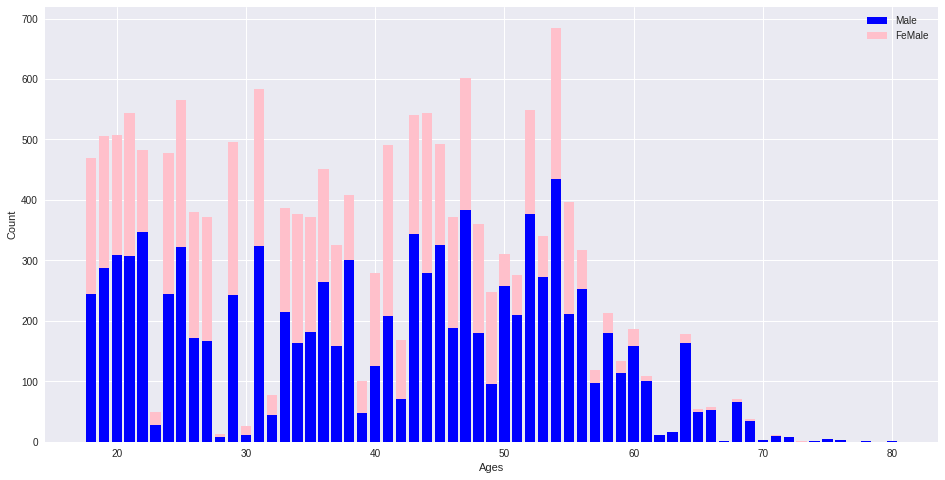

In [68]:
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)
counts = counts.fillna(0)
ages = boston_marathon['age'].unique()
plt.figure(figsize=(16,8))
plt.bar(ages, counts['M'], bottom=None, color='blue', label='Male')
plt.bar(ages, counts['F'], bottom=counts['M'], color='pink', label='FeMale')
plt.legend()
plt.xlabel('Ages')
plt.ylabel('Count')

<b>Nhận Xét: </b>Số lượng nam nhiều hơn số lượng nữ, số nam cao tuổi tham gia cũng nhiều hơn nữ

### Chọn column để train

In [0]:
feature_columns = ['25k', 'age', 'division', '10k', 'half', 'official',
       'overall', 'pace', '30k', '5k', 'genderdiv', '20k', '35k', '40k', 'gender', 'country', 'state', 'city']
X = boston_marathon[feature_columns]

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16163 entries, 0 to 16163
Data columns (total 18 columns):
25k          16163 non-null object
age          16163 non-null int64
division     16163 non-null int64
10k          16163 non-null object
half         16163 non-null object
official     16163 non-null float64
overall      16163 non-null int64
pace         16163 non-null float64
30k          16163 non-null object
5k           16163 non-null object
genderdiv    16163 non-null int64
20k          16163 non-null object
35k          16163 non-null object
40k          16163 non-null object
gender       16163 non-null object
country      16163 non-null object
state        16163 non-null object
city         16163 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 2.3+ MB


<b>Nhận Xét: </b> object: xóa những dòng là -, rồi chuyển qua dữ liệu loại float

In [0]:
X = X[X['25k'] != '-']

In [0]:
X['25k'] = X['25k'].astype(float)

In [0]:
X = X[X['10k'] != '-']

In [0]:
X['10k'] = X['10k'].astype(float)

In [0]:
X = X[X['half'] != '-']

In [0]:
X['half'] = X['half'].astype(float)

In [0]:
X = X[X['30k'] != '-']

In [0]:
X['30k'] = X['30k'].astype(float)

In [0]:
X = X[X['5k'] != '-']

In [0]:
X['5k'] = X['5k'].astype(float)

In [0]:
X = X[X['20k'] != '-']

In [0]:
X['20k'] = X['20k'].astype(float)

In [0]:
X = X[X['35k'] != '-']

In [0]:
X['35k'] = X['35k'].astype(float)

In [0]:
X = X[X['40k'] != '-']

In [0]:
X['40k'] = X['40k'].astype(float)

In [87]:
X.columns

Index(['25k', 'age', 'division', '10k', 'half', 'official', 'overall', 'pace',
       '30k', '5k', 'genderdiv', '20k', '35k', '40k', 'gender', 'country',
       'state', 'city'],
      dtype='object')

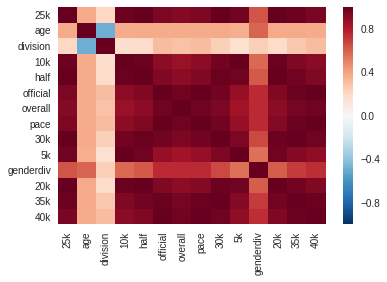

In [88]:
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### standardization numeric column

In [0]:
X['25k'] = (X['25k'] - X['25k'].mean())/X['25k'].std()
X['age'] = (X['age'] - X['age'].mean())/X['age'].std()
X['division'] = (X['division'] - X['division'].mean())/X['division'].std()
X['10k'] = (X['10k'] - X['10k'].mean())/X['10k'].std()
X['half'] = (X['half'] - X['half'].mean())/X['half'].std()
X['official'] = (X['official'] - X['official'].mean())/X['official'].std()
X['overall'] = (X['overall'] - X['overall'].mean())/X['overall'].std()
X['pace'] = (X['pace'] - X['pace'].mean())/X['pace'].std()
X['30k'] = (X['30k'] - X['30k'].mean())/X['30k'].std()
X['5k'] = (X['5k'] - X['5k'].mean())/X['5k'].std()
X['genderdiv'] = (X['genderdiv'] - X['genderdiv'].mean())/X['genderdiv'].std()
X['20k'] = (X['20k'] - X['20k'].mean())/X['20k'].std()
X['35k'] = (X['35k'] - X['35k'].mean())/X['35k'].std()
X['40k'] = (X['40k'] - X['40k'].mean())/X['40k'].std()

#### one hot encode những column là category

In [0]:
X = pd.get_dummies(X, columns=['gender', 'country', 'state', 'city']);

In [91]:
X.shape

(16053, 4542)

iter 1: 269121.45356008573
iter 2: 147738.0883841274
iter 3: 119715.60112938574
iter 4: 107822.40383278561
iter 5: 97663.45620885647
iter 6: 89307.23313446881
iter 7: 84380.17153784512
iter 8: 79921.07797898613
iter 9: 75891.5644078
iter 10: 72655.08208175817
iter 11: 69629.6430418788
iter 12: 67097.5153572633
iter 13: 65130.921207616164
iter 14: 63445.700185862035
iter 15: 62016.612033848294


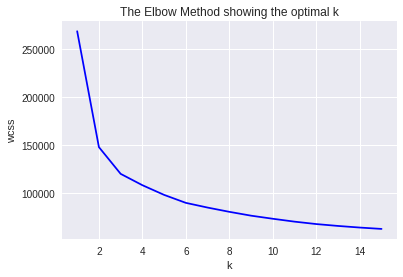

In [93]:
# k means determine k
wcss = []
K = range(1, 16)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++', random_state = 50)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)
    print('iter ' + str(k) + ': ' + str(kmeanModel.inertia_))


# Plot the elbow
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [94]:
#Chọn k = 3
kmeanModel = KMeans(n_clusters=3, init = 'k-means++', random_state = 50)
kmeanModel.fit(X)
print('Sum of squared distances of samples to their closest cluster center: ' + str(kmeanModel.inertia_))

Sum of squared distances of samples to their closest cluster center: 119715.60112938574


#### Gom nhóm dữ liệu

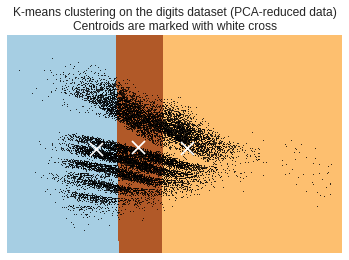

In [95]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 50)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()